<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriepruzkumu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie průzkumu

## Úvaha

Představte si, že máte prostor rozdělený na dvě části. Zvolíte si jednu část, kterou zkontrolujete. Protivník si taktéž zvolí část, kde bude přítomen. V případě, kdy zvolíte stejný prostor, vyhráváte, v opačném případě prohráváte.

Tento problém lze popsat pomocí maticové hry a vyřešit jako úlohu lineárního programování.

$$max\{v:A^Tx^B- \begin{pmatrix}v \\
v \\
\vdots \\
v
\end{pmatrix} \ge 0, \sum_{i=1}^nx_i^B=1,x^B \ge 0, v \in R\}$$

## Pravděpodobnost setkání

https://www.mathpages.com/home/kmath124/kmath124.htm

Mějme dvě náhodné proměnné s rovnoměrným rozdělením pravděpodobností na intervalu $<0;1>$. Jaká je pravděpodobnost, že jejich hodnoty jsou od sebe vzdálené maximálně $q$? 

$$P_2=2q-q^2$$





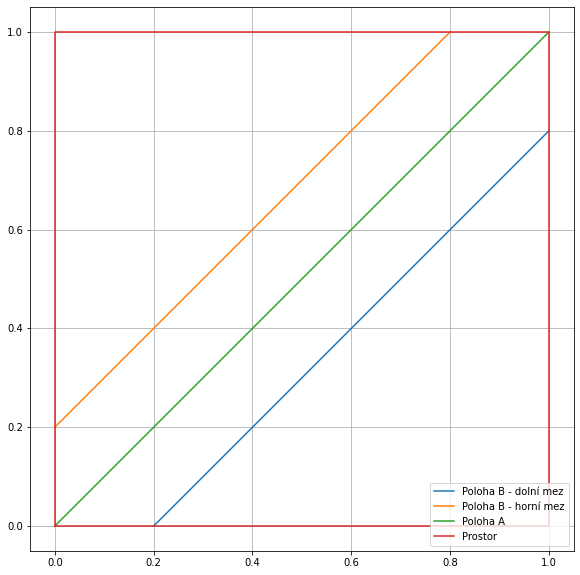

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
                                  
def drawPicture(q):
  a = {'x': [q, 1], 'y': [0, 1 - q]}
  b = {'x': [0, 1 - q], 'y': [q, 1]}
  c = {'x': [0, 1], 'y': [0, 1]}
  d = {'x': [0, 1, 1, 0, 0], 'y': [0, 0, 1, 1, 0]}
  all = [a, b, c, d]
  for i in all:
    plt.plot(i['x'], i['y'])
  plt.legend(['Poloha B - dolní mez', 'Poloha B - horní mez', 'Poloha A', 'Prostor'], loc='lower right')
  plt.grid('both')
  plt.gca().set_aspect('equal')

drawPicture(0.2)

Úlohu o setkání lze řešit v čase. Jaká je pravděpodobnost setkání dvou lidí, jestliže na dané místo dorazí někdy v čase $<t;t+1[h]>$ a na místě setrvají právě $\Delta t [h]$. Čas lze zobrazit stejně jako v úloze výše a tedy výpočet je naprosto stejný.

Zobecněný vztah pro $n$ náhodných proměnných je

$$P_n=nq^{n-1}-(n-1)q^n$$

## Doplňkový studijní materiál

https://www.youtube.com/watch?v=YXLVjCKVP7U

https://www.youtube.com/watch?v=ce3kUWkY9IY

https://www.youtube.com/watch?v=3xAIWiTJCvE

https://stats.libretexts.org/Courses/Saint_Mary%27s_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/4%3A_Continuous_Random_Variables/4.1%3A_Probability_Density_Functions_(PDFs)_and_Cumulative_Distribution_Functions_(CDFs)_for_Continuous_Random_Variables


Pojem pro vyhledávání v anglických textech **Probabilistic time geography**


## Simulační přístup

### Rozmístění v rovině

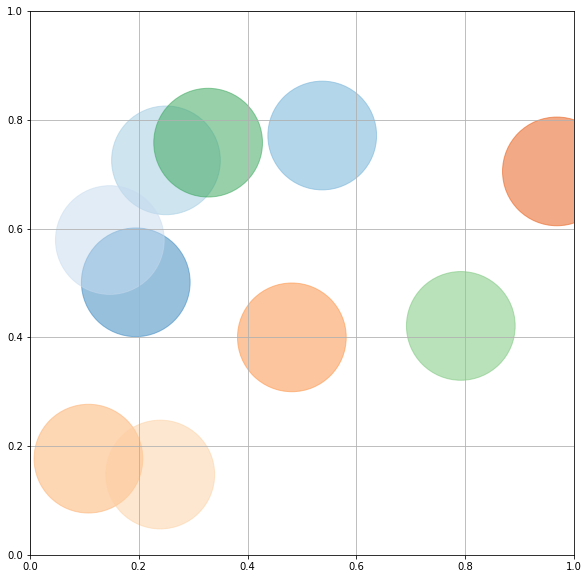

In [66]:
import random
from cycler import cycler

def plotPoints(count, size):
  figure, axes = plt.subplots()

  colors = iter(cycler("color", plt.cm.tab20c.colors))
  for i in range(count):
    a = (random.random(), random.random())
    color = next(colors)
    draw_circle = plt.Circle(a, size, alpha=0.5, **color)
    axes.add_artist(draw_circle)

  axes.set_aspect(1)
  plt.grid('both')
  plt.show()

plotPoints(10, 0.1)  

### Výpočet pravděpodobnosti pomocí simulace

$$P=\frac{\sum_{x \in X} f(x)}{\lVert {X} \rVert }$$

In [47]:
def simProbability(func, count=10000):
  sum = 0
  for i in range(count):
    if func():
      sum += 1
  return sum / count

Výpočet hodnoty funkce kumulativní pravděpodobnosti

In [48]:
def func(limit):
  value = random.random()
  return value < limit

f = lambda:func(0.2)
P = simProbability(f, 10000)
print(0.2, P)

0.2 0.1952


Náhodný bod v rovině a v prostoru

In [49]:
import random
from math import sqrt

def randomPoint2D():
  return random.random(), random.random()

def randomPoint3D():
  return random.random(), random.random(), random.random()  

Hra na programování

In [50]:
def createFunc(f, count):
  def result(limit):
    bf = lambda:f(limit)
    return simProbability(bf, count)
  return result

Tvorba funkce kumulativní pravděpodobnosti

In [51]:
def func(limit):
  value = random.random()
  return value < limit
  
cdf = createFunc(func, 10000)

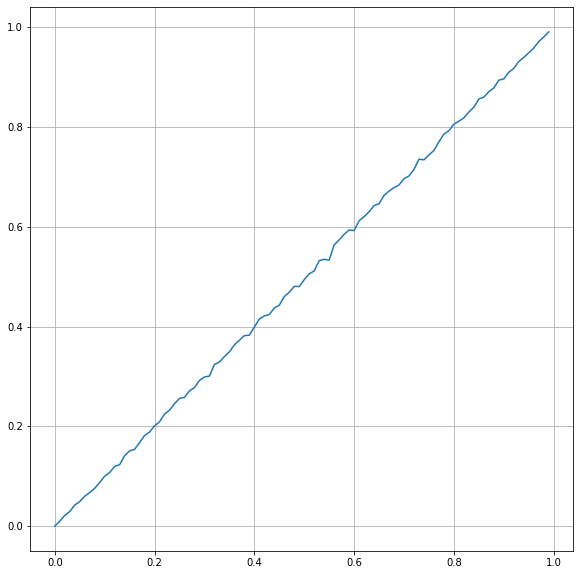

In [65]:
xx = [i / 100 for i in range(100)]
yy = [cdf(x) for x in xx]
plt.plot(xx, yy)
plt.grid('both')
plt.gca().set_aspect('equal')
plt.show()

Výpočet funkce kumulativní pravděpodobnosti

In [53]:
def simIt(experimentFunc):
  xx = []
  yy = []

  count = 100
  for i in range(count):
    x = i / count
    func = lambda : experimentFunc(x)
    probability = simProbability(func, 10000)
    xx.append(x)
    yy.append(probability)
  return xx, yy
  
def plotIt(xx, yy):
  plt.plot(xx, yy)
  plt.grid('both')
  plt.gca().set_aspect('equal')
  plt.title('Pravděpodobnost zjištění v závislosti na pozorovací vzdálenosti')
  plt.xlabel('Pozorovací vzdálenost')
  plt.ylabel('Pravděpodobnost')

Je žádoucí si uvědomit, že z hlediska matematického popisu je stejné řešit úlohu v R a čase a úlohu v RxR.

Obecná funkce pro test, zda dva body jsou v předpokládáné vzdálenosti

In [54]:
def distanceTest(a, b, distance):
  total = 0
  for ai, bi in zip(a, b):
    delta = ai - bi
    total = total + delta * delta
    
  return sqrt(total) < distance

Pozorování jedním pozorovatelem je ekvivalentní situaci, kdy pozorovatel je od pozorovaného ve vzdálenosti, ze které je schopen pozorovat.

In [55]:
def twoPointsIn2D(distance):
  a = randomPoint2D()
  b = randomPoint2D()
  return distanceTest(a, b, distance)

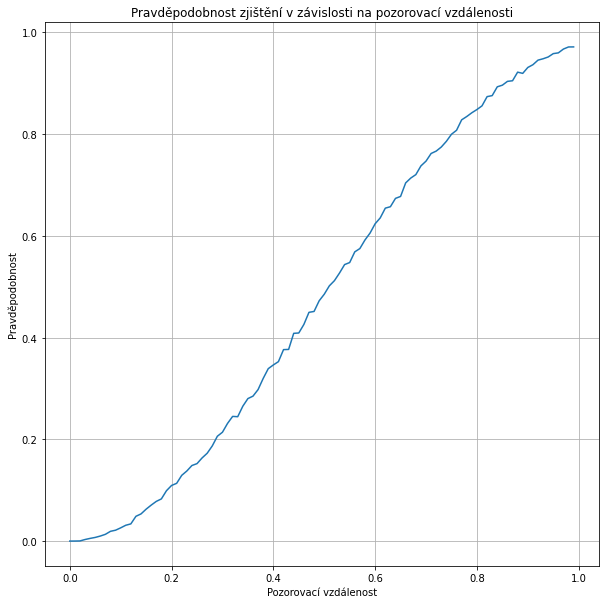

In [56]:
xx, yy = simIt(twoPointsIn2D) 
plotIt(xx, yy)

Pozorování dvěma pozorovateli je ekvivalentní situaci, kdy alespoň jeden z pozorovatelů je v potřebné vzdálenosti.

In [57]:
def threePointsIn2D(distance):
  a = randomPoint2D()
  b = randomPoint2D()
  c = randomPoint2D()
  return distanceTest(a, b, distance) or distanceTest(a, c, distance)

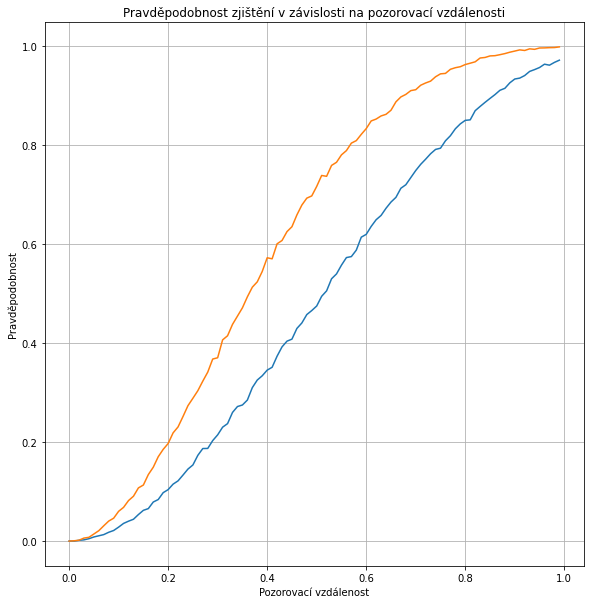

In [58]:
xx2, yy2 = simIt(twoPointsIn2D)
plotIt(xx2, yy2)
xx3, yy3 = simIt(threePointsIn2D)
plotIt(xx3, yy3)

Prostor 3D

Jeden pozorovatel

In [59]:
def twoPointsIn3D(distance):
  a = randomPoint3D()
  b = randomPoint3D()
  return distanceTest(a, b, distance)

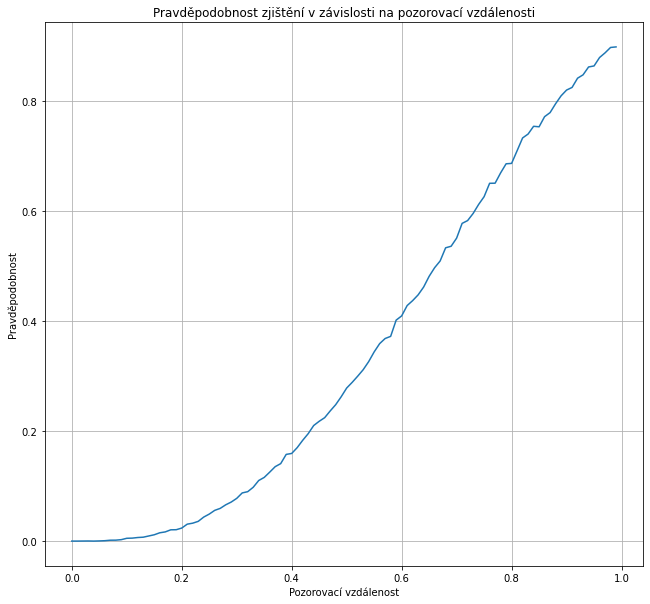

In [60]:
xx, yy = simIt(twoPointsIn3D) 
plotIt(xx, yy)

Dva pozorovatelé, srovnání s jedním pozorovatelem

In [61]:
def threePointsIn3D(distance):
  a = randomPoint3D()
  b = randomPoint3D()
  c = randomPoint3D()
  return distanceTest(a, b, distance) or distanceTest(a, c, distance)

Srovnání pozorování v 2D a 3D jedním a dvěma pozorovateli

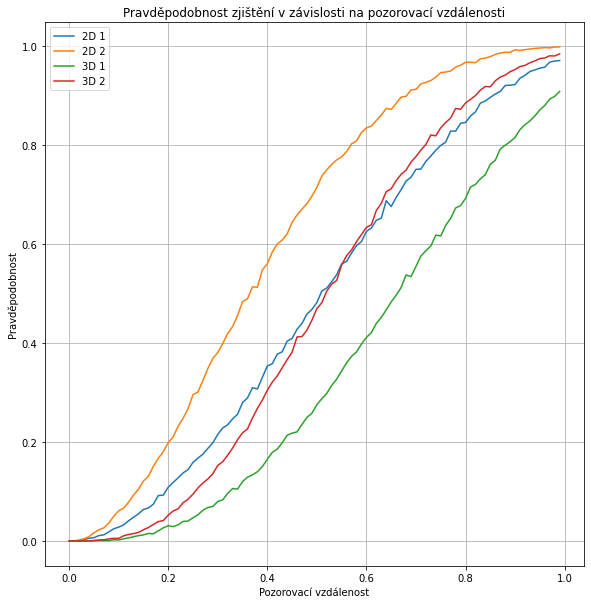

In [62]:
xx22, yy22 = simIt(twoPointsIn2D)
plotIt(xx22, yy22)
xx23, yy23 = simIt(threePointsIn2D)
plotIt(xx23, yy23)

xx23, yy23 = simIt(twoPointsIn3D) 
xx33, yy33 = simIt(threePointsIn3D) 
plotIt(xx23, yy23)
plotIt(xx33, yy33)

plt.legend(['2D 1', '2D 2', '3D 1', '3D 2'])

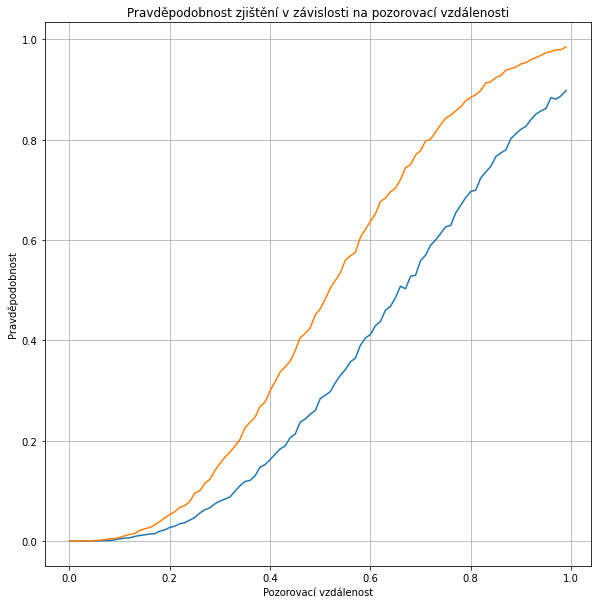

In [63]:
xx2, yy2 = simIt(twoPointsIn3D) 
xx3, yy3 = simIt(threePointsIn3D) 
plotIt(xx2, yy2)
plotIt(xx3, yy3)

## Čas a dynamika

Čas je dalším rozměrem a tak s ním lze nakládat. 2D prostor se s přidáním času mění na 3D a 3D se přidáním času mění na 4D.

V případě dynamického pohybu jak pozorovatel, tak pozorovaný se v prostoru pohybují spojitě. Z toho vyplývá, že pravděpodobnost je závislá na strategii pohybu. Tato úloha je řešitelná dynamickým programováním, ovšem úloha je svoji složitostí nad záměr tohoto kurzu.